# Calculate and Plot Phasors on Synthetic Data

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import napari
# from PhasorPy import phasor, phasor_plot, rgb_coloring, phasor_circle, histogram_filtering
from FLIM_phasor import *
from matplotlib import colors

## Make Synthetic FLIM data

Input options:

In [3]:
laser_frequency = 60 # MHz
amplitude = 1
tau = 1 # ns
number_of_harmonics = 5
number_of_time_points = 2700

### Create time array

In [4]:
time_array = create_time_array(laser_frequency, number_of_time_points)

In [5]:
time_array.shape

(2700,)

### Exponential function

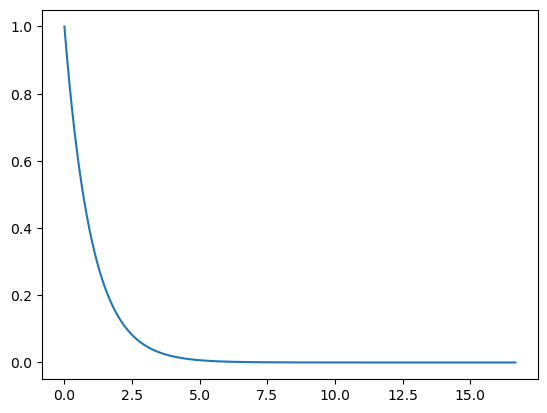

In [6]:
plt.plot(time_array, monoexp(time_array, amplitude, tau))

### Make Synthetic Image

In [7]:
flim_data = make_synthetic_flim_data(time_array, amplitude, tau)

In [8]:
flim_data.shape

(2700, 1, 1)

## Plot different harmonics

Below we plot up to 5 harmonics for a single tau

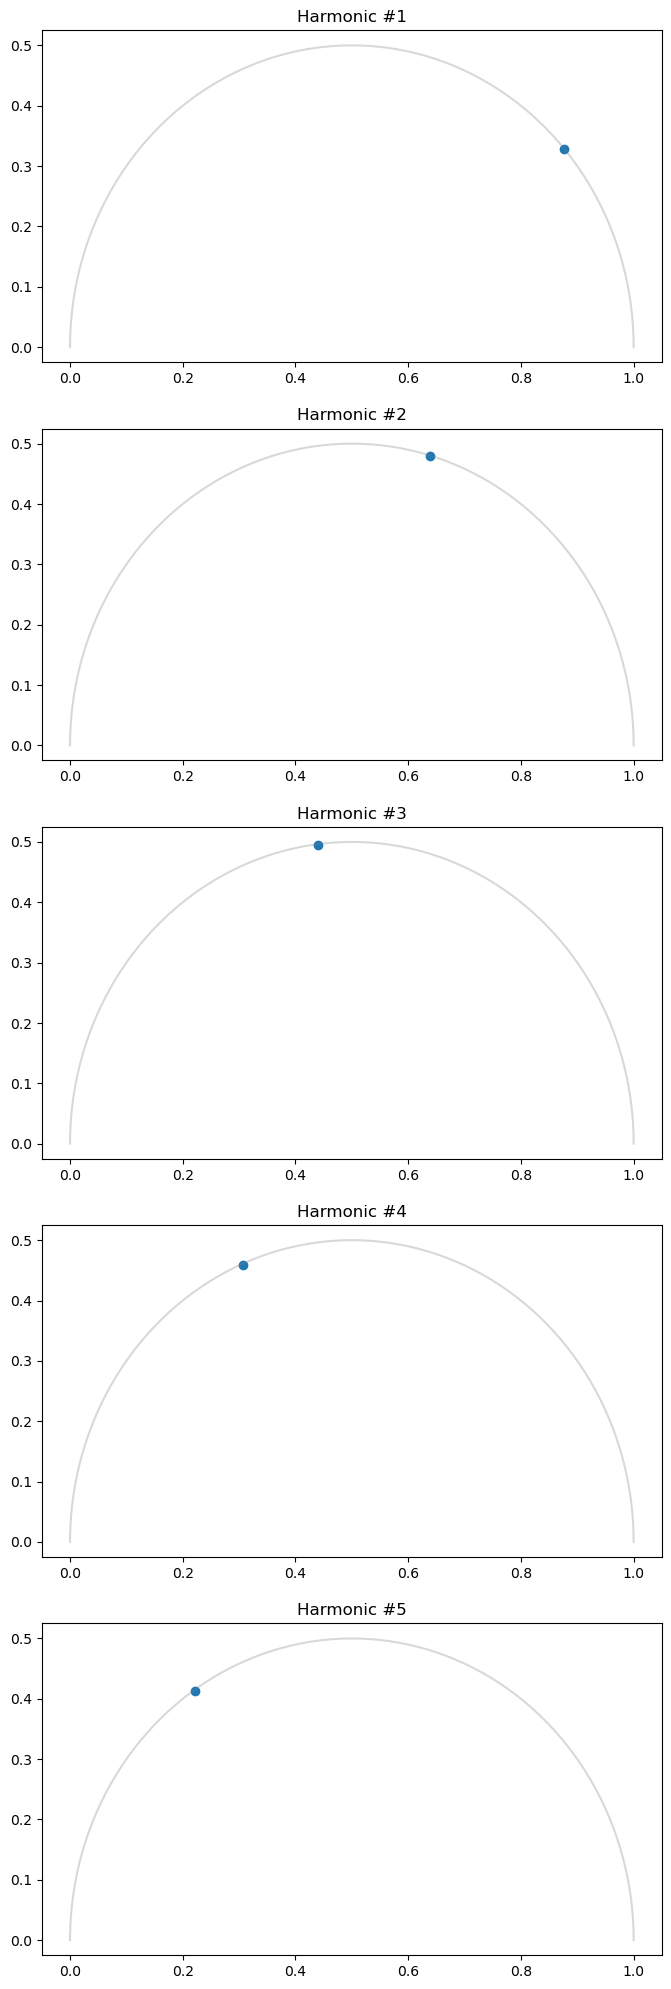

In [9]:
fig, ax = plt.subplots(number_of_harmonics, 1, figsize=(8, number_of_harmonics*5))
for i in range(number_of_harmonics):
    g, s, dc = get_phasor_components(flim_data, harmonic = i+1)
    x = np.ravel(g)
    y = np.ravel(s)
    add_phasor_circle(ax[i])
    ax[i].scatter(x, y)
    title = 'Harmonic #' + str(i+1)
    ax[i].set_title(title)

## Plot different tau and frequencies

Below we plot the first harmonics for a list of different tau and a list of different frequencies. Each tau is displayed with a different color, and each frequency is displayed in a different plot.

In [10]:
number_of_harmonics = 1
amplitude = 1
tau_list = [0.1, 0.2, 0.5, 1, 2, 5, 10, 25, 40] # ns
frequency_list = [40, 60, 80] # MHz

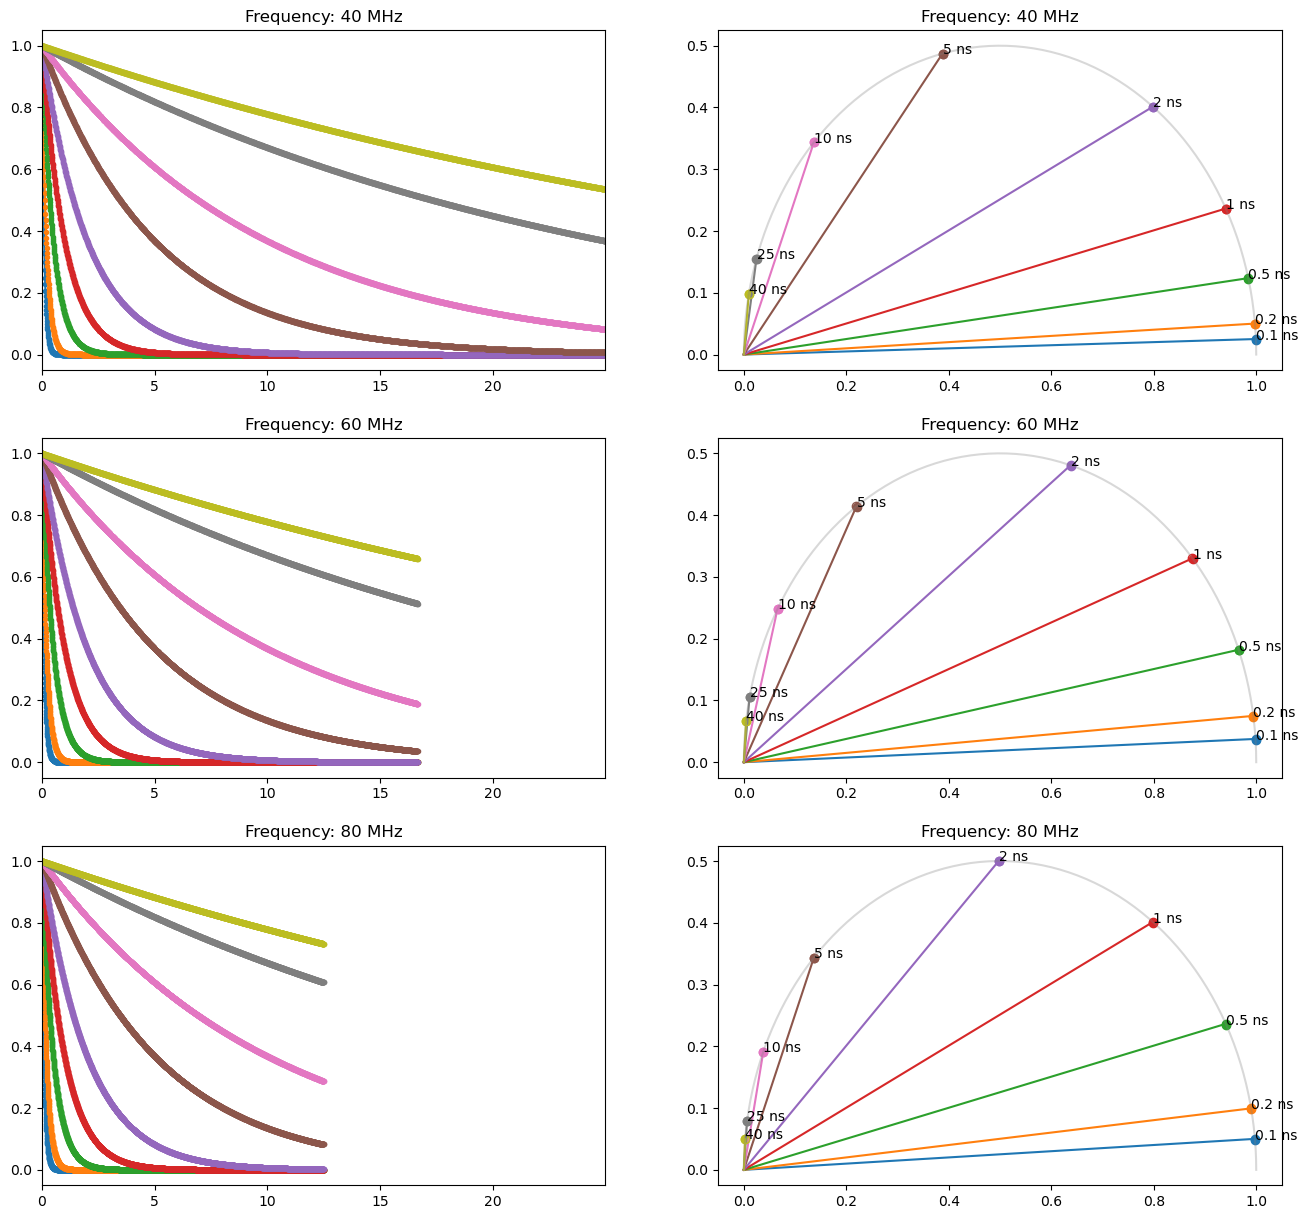

In [12]:
fig, ax = plt.subplots(len(frequency_list), 2, figsize=(16, len(frequency_list)*5))
max_time = []
for i, frequency in enumerate(frequency_list):
    time_array = create_time_array(frequency, number_of_time_points)
    max_time.append(max(time_array))
    for tau in tau_list:
        # Plot time domain
        line, = ax[i,0].plot(time_array, monoexp(time_array, amplitude, tau))
        ax[i,0].plot(time_array, monoexp(time_array, amplitude, tau), '.', color = line.get_color())
        
        # Phasor plot
        flim_data = make_synthetic_flim_data(time_array, amplitude, tau)
        g, s, dc = get_phasor_components(flim_data, harmonic = 1)
        x = np.ravel(g)
        y = np.ravel(s)
        ax[i,1].scatter(x, y)
        text = str(tau) + ' ns'
        ax[i,1].text(x, y, text)
        add_tau_lines(ax[i,1], tau, frequency)
    add_phasor_circle(ax[i,1])
    
    title = 'Frequency: ' + str(frequency) + ' MHz'
    ax[i,0].set_title(title)
    ax[i,0].set_xlim(0, max(max_time))
    ax[i,1].set_title(title)